## MPPNP HIF case for modeling H ingestion and I process

Mimic of H ingestion by modifying the top layer and adding a certain amount of H.
The diffusion coefficient is modified to create a split of the convective zone and written into the SE input files.
Originally adopted for the Sakurai case (Herwig11) the example can be adopted for different setups.


In [11]:
%pylab nbagg
import nugridse as mp
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

Populating the interactive namespace from numpy and matplotlib


In [37]:
sefiles=mp.se('../H5_out')

sedir =  ../H5_out
Searching files, please wait.......
try following:
done
Writing preprocessor files
e2D14_hif.0079001.out.h5
e2D14_hif.0078101.out.h5
e2D14_hif.0078301.out.h5
e2D14_hif.0078601.out.h5
e2D14_hif.0078901.out.h5
e2D14_hif.0078401.out.h5
e2D14_hif.0079401.out.h5
e2D14_hif.0079201.out.h5
e2D14_hif.0078701.out.h5
e2D14_hif.0079801.out.h5
e2D14_hif.0078501.out.h5
e2D14_hif.0078201.out.h5
e2D14_hif.0079301.out.h5
e2D14_hif.0077501.out.h5
e2D14_hif.0078001.out.h5
e2D14_hif.0079101.out.h5
e2D14_hif.0078801.out.h5
e2D14_hif.0079701.out.h5
e2D14_hif.0079601.out.h5
e2D14_hif.0079901.out.h5
e2D14_hif.0079501.out.h5
File search complete.
Closing plot_tools


In [38]:
fig=1

### Split in diffusion coefficient

 reading ['mass']...100%

<IPython.core.display.Javascript object>


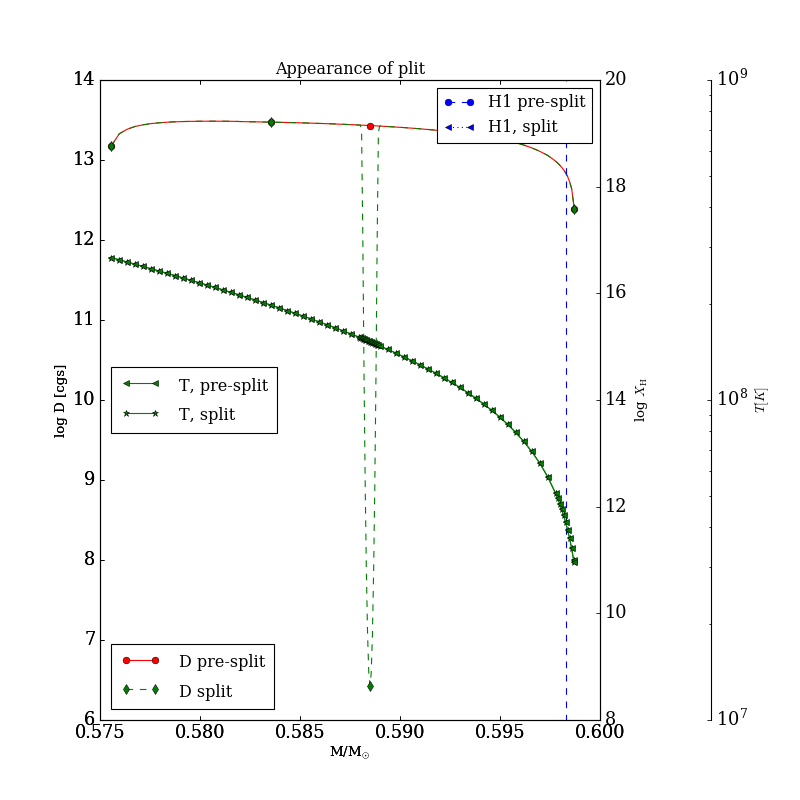

 reading ['temperature']...100%

In [39]:
#split appears at cycle number 951:

offset=77991
fig = fig   +1
plt.close(fig)
for cyc in [[950,951]]:#[[949,950]]:
        cyc[0]=offset+cyc[0]
        cyc[1]=offset+cyc[1]
        mass=sefiles.get(cyc[0]+offset,'mass')
        plt.figure(fig,figsize=(10,10),dpi=80)

        d_presplit=np.log10(sefiles.get(cyc[0],'dcoeff')) #before split, [d] = cm^2/s
        d_split=np.log10(sefiles.get(cyc[1],'dcoeff')) # split occurs
        #print 'dsplit: ',d_split
        #print sefiles.get('dcoeff_unit')

        h1_presplit=np.log10(sefiles.get(cyc[0],'H-1'))
        h1_split=np.log10(sefiles.get(cyc[1],'H-1'))

        T_presplit=sefiles.get(cyc[0],'temperature')
        T_split=sefiles.get(cyc[1],'temperature')


        plt.rcParams.update({'font.size': 16})
        plt.rc('xtick', labelsize=16)
        plt.rc('ytick', labelsize=16)
        plt.show()
        plt.rc('font', family='serif', size=16)

        host=host_subplot(111, axes_class=AA.Axes)
        host.yaxis.label.set_size(16)
        plt.subplots_adjust(right=0.75)
        par1 = host.twinx()
        par2 = host.twinx()

        offset = 100
        new_fixed_axis = par2.get_grid_helper().new_fixed_axis
        par2.axis["right"] = new_fixed_axis(loc="right",axes=par2,offset=(offset, 0))
        par2.axis["right"].toggle(all=True)

        p1,=host.plot(mass,d_presplit,'r-',label='D pre-split',marker='o',markevery=20)
        p1,=host.plot(mass,d_split,'g--',label='D split',marker='d',markevery=20)


        host.set_ylim(6,14)
        #host.set_yscale('log')
        host.set_ylabel('log D [cgs]',fontsize=16)
        host.legend(loc=3)

        p1,=par1.plot(mass,h1_presplit,'b--',label='H1 pre-split',marker='o',markevery=5)#,label='$\epsilon_\mathrm{nuc}$')
        p1,=par1.plot(mass,h1_split,'b:',label='H1, split',marker='<',markevery=5)


        par1.set_ylabel('log $X_\\mathrm{H}$',fontsize=16)
        #par1.set_yscale('log')
        par1.legend(loc=4)

        par1.set_ylim(-7,0)


        p2,=par2.plot(mass,np.array(T_presplit)*1e9,'g-',marker='<',label='T, pre-split')
        p2,=par2.plot(mass,np.array(T_split)*1e9,'g-',marker='*',label='T, split')


        #par2.set_ylim(2e7,1e9)
        par2.set_yscale('log')
        par2.set_ylabel('$T[K]$',fontsize=16)
        par2.legend(loc=6)

        m_hing=mass[-1]-4.e-4
        plt.plot([m_hing,m_hing],[1,1e9],'--')


        plt.xlabel("M/M$_{\odot}$",fontsize=16)

        plt.rcParams.update({'font.size': 16})
        plt.rc('xtick', labelsize=16)
        plt.rc('ytick', labelsize=16)
        plt.show()
        plt.rc('font', family='serif', size=16)
        host.yaxis.label.set_size(16)
        plt.title('Appearance of plit')

## Light elements for key cycles

 reading ['iso_massf']...100%

<IPython.core.display.Javascript object>


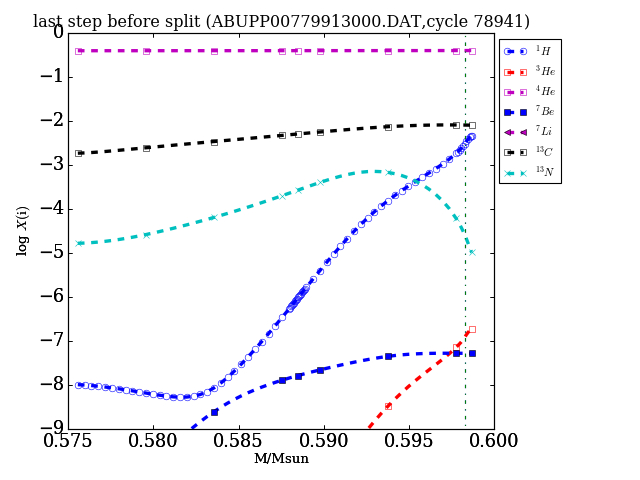

 reading ['iso_massf']...100%

<IPython.core.display.Javascript object>


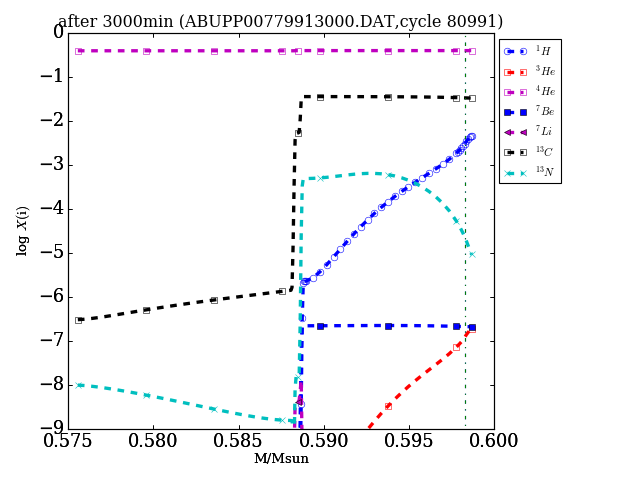

In [42]:

sp_cycle=1

#Note: split appears at cycle number 950

offset=77991
####Decide to plot first and last cycle via option 1 and 2
for i in [1,2,3]:
        if i == 1:
             continue
        #    #first cycle
        #    sp_cycle=1
        #    cyc  =offset + sp_cycle
        #    label='first timestep'
        elif i==2:
             #last cycle before split
            sp_cycle=950         
            label='last step before split'
            cyc = offset + sp_cycle
        elif i==3:
            #last cycle
            sp_cycle=3000                
            cyc = offset + sp_cycle
            label='after 3000min'

        mass1=sefiles.get(cyc,'mass')
        rho= np.array(sefiles.get(cyc,'rho')) #cgs g/cm3
        x_n= np.array(sefiles.get(cyc,'Neutron-1'))
        mn= 1.674927351e-30 #g
        #Nn_1=np.log10( x_n*rho/mn   )
        h1_1=np.log10(sefiles.get(cyc,'iso_massf','H-1'))
        he3_1=np.log10(sefiles.get(cyc,'iso_massf','He-3'))
        he4_1=np.log10(sefiles.get(cyc,'iso_massf','He-4'))
        be7_1=np.log10(sefiles.get(cyc,'iso_massf','Be-7'))
        li7_1=np.log10(sefiles.get(cyc,'iso_massf','Li-7'))
        c13_1=np.log10(sefiles.get(cyc,'iso_massf','C-13'))
        n13_1=np.log10(sefiles.get(cyc,'iso_massf','N-13'))
        #sr_1=0
        #for iso in sefiles.se.isotopes:
        #        if 'Sr' in iso:
        #                sr_1+=sefiles.get(cyc,'iso_massf',iso)
        #sr_1=np.log10(sr_1)
########
        fig = fig +1
        plt.figure(fig)
        host=host_subplot(111, axes_class=AA.Axes)
        #plt.subplots_adjust(right=0.75)
        #par1 = host.twinx()
        host.set_ylim(-9,0)
        #host.set_yscale('log')
        ing_bdy=mass[-1]-4e-4
        p1,=host.plot([ing_bdy,ing_bdy],[-16,0],'-.')
        host.legend(loc=2)
        par1.legend(loc=1)
        p1,=host.plot(mass1,h1_1,'b--',label='$^1H$',linewidth=3,markeredgecolor='b',markerfacecolor='none',marker='o',markevery=1)
        p1,=host.plot(mass1,he3_1,'r--',label='$^3He$',linewidth=3,markeredgecolor='r',markerfacecolor='none',marker='s',markevery=10)
        p1,=host.plot(mass1,he4_1,'--',label='$^4He$',linewidth=3,color='m',markeredgecolor='m',markerfacecolor='none',marker='s',markevery=10)
        p1,=host.plot(mass1,be7_1,'b--',label='$^7Be$',linewidth=3,marker='s',markevery=10)
        p1,=host.plot(mass1,li7_1,'m--',label='$^7Li$',linewidth=3,marker='<',markevery=10)
        p1,=host.plot(mass1,c13_1,'k--',label='$^{13}C$',linewidth=3,markeredgecolor='k',markerfacecolor='none',marker='s',markevery=10)
        p1,=host.plot(mass1,n13_1,'c--',label='$^{13}N$',linewidth=3,markeredgecolor='c',marker='x',markevery=10)
        #p1,=host.plot(mass1,sr_1,'k--',label='$Sr$',linewidth=3)#,label='$Sr$',marker='d',markevery=10)
        ing_bdy=mass1[-1]-4e-4
        p1,=host.plot([ing_bdy,ing_bdy],[-16,0],'-.')    
        host.set_ylabel('log $X(\\mathrm{i})$')
        #host.legend(loc=2)
        #par1.set_ylabel('$N_n$')
        #p100,=par1.plot(mass,Nn,label='Nn',linestyle='-',markeredgecolor='r',color='r',marker='+',markevery=10)
        #p100,=par1.plot(mass1,Nn_1,label='RUN48 Nn',linewidth=3,linestyle='--',markeredgecolor='r',color='r',marker='+',markevery=10)
        plt.xlim(0.575,0.6)
        #par1.legend(loc=1)
        par1.set_ylim(8,20)
        plt.xlabel('M/Msun')
        plt.rcParams.update({'font.size': 12})
        host.yaxis.label.set_size(26)
        plt.show()
        plt.title(label+' ('+file1+','+'cycle '+str(cyc)+')')      
        plt.legend(loc='upper left', bbox_to_anchor=(1,1),prop={'size':10});plt.tight_layout()
        ax=plt.gca()
        box = ax.get_position();ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

## Heavy elements

 reading ['iso_massf']...100%

<IPython.core.display.Javascript object>


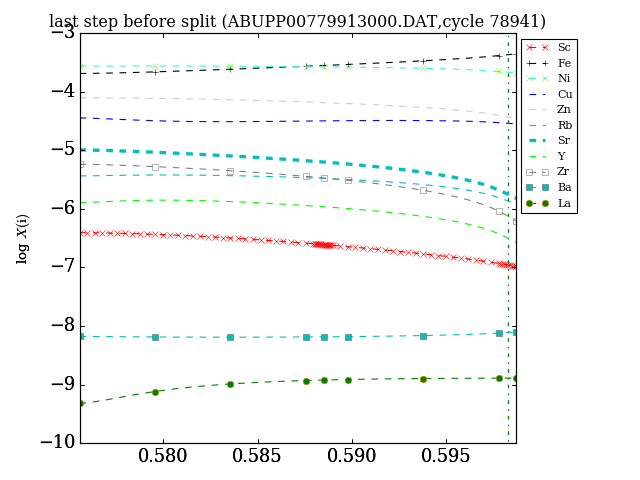

 reading ['iso_massf']...100%

<IPython.core.display.Javascript object>


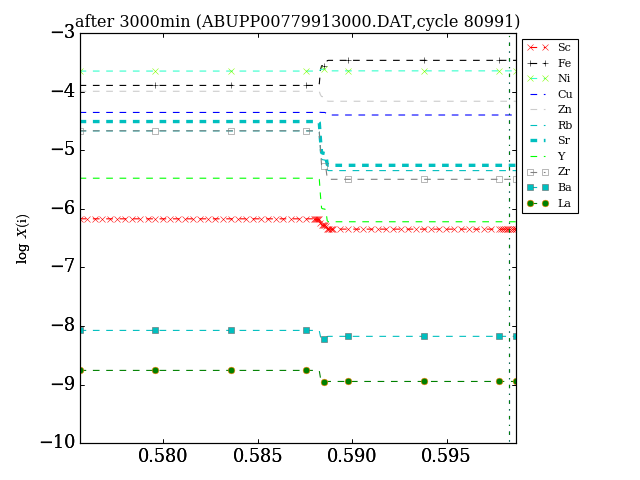

In [43]:
#split appears at cycle number 950
offset=77991    
for i in [1,2,3]:
        if i == 1:
            #first cycle
            continue
            #sp_cycle=1
            #cyc  =offset + sp_cycle
            #label='first timestep'
        elif i==2:
             #last cycle before split
            sp_cycle=950         
            label='last step before split'
            cyc = offset + sp_cycle
        elif i==3:
            #last cycle
            sp_cycle=3000                
            cyc = offset + sp_cycle
            label='after 3000min'    
    
        mass1=sefiles.get(cyc,'mass')
        isotopes_1=sefiles.se.isotopes
        ####heavy elements to compare
        elements=['Sc','Fe','Ni','Cu','Zn','Rb','Sr','Y','Zr','Ba','La']
        yields_1=  [  [0]*len(mass1)    ] *len(elements)
        for iso in isotopes_1:
                for ele in elements:
                        if ele in iso:
                                yields_1[elements.index(ele)]= np.array(yields_1[elements.index(ele)]) + np.array(sefiles.get(cyc,'iso_massf',iso))

        for k in range(len(elements)):
                yields_1[k]= np.log10(yields_1[k])
########
        #rho= rhoppg  #cgs g/cm3
        #x_n= isotopes_massfrac[0]
        #mn= 1.674927351e-30 #g
        #Nn=np.log10( np.array(x_n)*rho/mn   )

#####
        #elements=['Sc','Fe','Ni','Cu','Zn','Rb','Sr','Y','Zr','Ba','La']
        fig = fig   +1
        plt.close(fig)
        plt.figure(fig)
        host=host_subplot(111, axes_class=AA.Axes)
        #plt.subplots_adjust(right=0.75)
        #par1 = host.twinx()
        host.set_ylim(-10,-3)

        ing_bdy=mass[-1]-4e-4
        p1,=host.plot([ing_bdy,ing_bdy],[-12,-2],'-.')                
        p1,=host.plot(mass,yields_1[0],'r--',label='Sc',markeredgecolor='r',markerfacecolor='none',marker='x',markevery=1)
        p1,=host.plot(mass,yields_1[1],'k--',label='Fe',markeredgecolor='k',markerfacecolor='none',marker='+',markevery=10)
        p1,=host.plot(mass,yields_1[2],'--',color=(0.2,1,0.8),label='Ni',markeredgecolor=(0.5,1,0),markerfacecolor='none',marker='x',markevery=10)
        p1,=host.plot(mass,yields_1[3],'b--',label='Cu',marker='',markevery=10)
        p1,=host.plot(mass,yields_1[4],'--',color=(0.8,0.8,0.8),label='Zn',markeredgecolor=(0.2,0.2,0.2),markerfacecolor='none',marker='',markevery=10)
        p1,=host.plot(mass,yields_1[5],'c--',label='Rb',markeredgecolor='c',marker='',markevery=10)
        p1,=host.plot(mass,yields_1[6],'--',color='c',label='Sr',linewidth=3,markeredgecolor='k',marker='',markevery=1)
        p1,=host.plot(mass,yields_1[7],'--',color=(0,1,0),label='Y',markerfacecolor='none',markeredgecolor=(0,1,0),marker='',markevery=10)
        p1,=host.plot(mass,yields_1[8],'--',color=(0.5,0.5,0.5),label='Zr',markerfacecolor='none',markeredgecolor=(0.5,0.5,0.5),marker='s',markevery=10)
        p1,=host.plot(mass,yields_1[9],'--',color='c',label='Ba',markeredgecolor=(0.4,0.4,0.4),marker='s',markevery=10)
        p1,=host.plot(mass,yields_1[10],'--',color='g',label='La',markeredgecolor=(1,0.5,0),marker='o',markevery=10)
        ing_bdy=mass1[-1]-4e-4
        p1,=host.plot([ing_bdy,ing_bdy],[-16,0],'-.')
        plt.xlim(mass[0],mass[-1])
        host.set_ylabel('log $X(\\mathrm{i})$')
        plt.title(label+' ('+file1+','+'cycle '+str(cyc)+')') 
        plt.legend(loc='upper left', bbox_to_anchor=(1,1),prop={'size':10});plt.tight_layout()
        ax=plt.gca()
        box = ax.get_position();ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])